### **Creating Environment and setting up the files**

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
from sklearn import linear_model


In [234]:
covid = pd.read_csv("covid_19_data.csv")

In [235]:
covid.head()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0,0,0


In [236]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
covid.tail()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
18322,18323,2020-04-24,US,25/04/2020 06:31,473,7,0
18323,18324,2020-04-24,Mainland China,25/04/2020 06:31,76,3,73
18324,18325,2020-04-24,Canada,25/04/2020 06:31,11,0,0
18325,18326,2020-04-24,Mainland China,25/04/2020 06:31,185,2,180
18326,18327,2020-04-24,Mainland China,25/04/2020 06:31,1268,1,1256


In [237]:
covid.drop(["SNo"],1,inplace=True)

In [238]:
covid.isnull().sum()

ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [239]:
covid.shape

(18327, 6)

# **Necessary variables introduction**

In [240]:
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [241]:
covid_weekly = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [242]:
datewise["WeekofYear"] = datewise.index.weekofyear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [243]:
datewise.describe()

,Confirmed,Recovered,Deaths,WeekofYear
count,94,94,94,94
mean,590756,149061,35227,10
std,823144,205804,55664,4
min,555,28,17,4
25%,67423,8392,1559,7
50%,111708,61604,3900,10
75%,913826,189385,45634,14
max,2811193,793601,197159,17


In [244]:
datewise.shape

(94, 4)

# **Analysis On the Confirmed Cases**

In [245]:
covid['Confirmed'].describe

<bound method NDFrame.describe of 0           1
1          14
2           6
3           1
4           0
         ... 
18322     473
18323      76
18324      11
18325     185
18326    1268
Name: Confirmed, Length: 18327, dtype: int64>

In [246]:
print("The number of people who were confirmed to have Covid on the first day of analysis is :",
      datewise["Confirmed"].iloc[1])

The number of people who were confirmed to have Covid on the first day of analysis is : 653


In [247]:
print("The number of people who were confirmed to have Covid on the last day of analysis is :",
      datewise["Confirmed"].iloc[-1])

The number of people who were confirmed to have Covid on the last day of analysis is : 2811193


In [248]:
print("The average number of people who were confirmed to be covid positive from the taken dates is  :",
   round(datewise["Confirmed"].mean()))

The average number of people who were confirmed to be covid positive from the taken dates is  : 590756


# **Analysis of confirmed case on daily basis and a weekly basis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

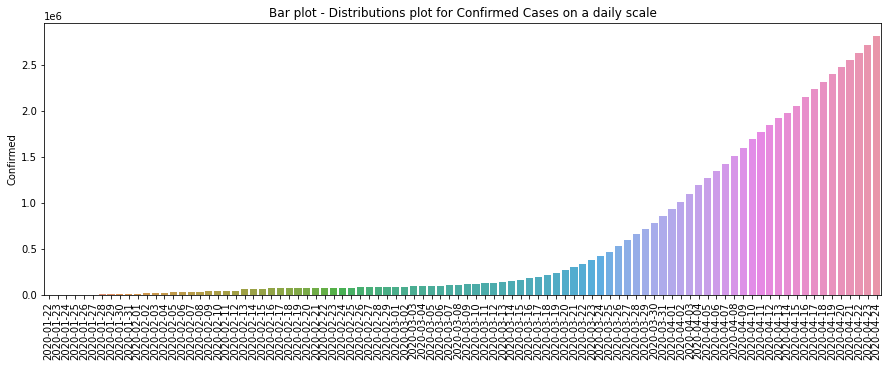

In [249]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"])
plt.title("Bar plot - Distributions plot for Confirmed Cases on a daily scale")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

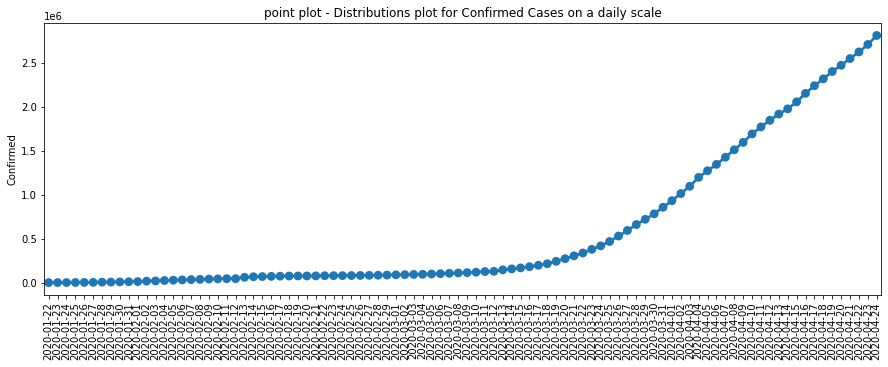

In [250]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.date,y=datewise["Confirmed"])
plt.title("point plot - Distributions plot for Confirmed Cases on a daily scale")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

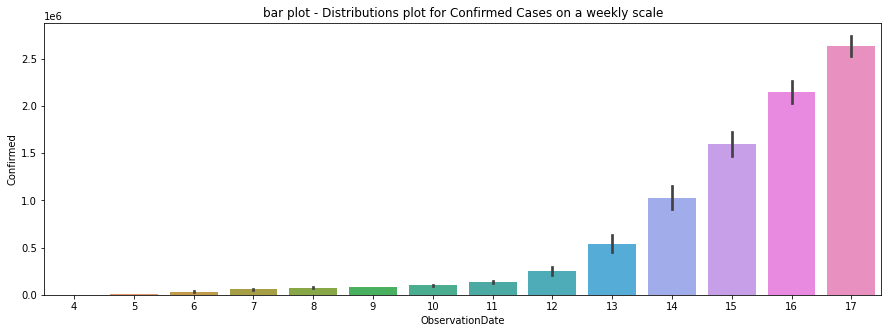

In [251]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.weekofyear,y=datewise["Confirmed"])
plt.title("bar plot - Distributions plot for Confirmed Cases on a weekly scale")
plt.xticks(rotation=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

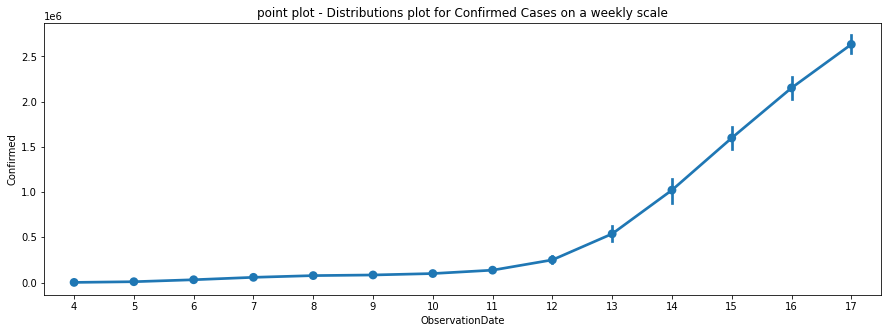

In [252]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.weekofyear,y=datewise["Confirmed"])
plt.title("point plot - Distributions plot for Confirmed Cases on a weekly scale")
plt.xticks(rotation=0)

# **Analysis on the recovered case**

In [253]:
covid['Recovered'].describe

<bound method NDFrame.describe of 0           0
1           0
2           0
3           0
4           0
         ... 
18322       0
18323      73
18324       0
18325     180
18326    1256
Name: Recovered, Length: 18327, dtype: int64>

In [254]:
print("The number of people who Recovered from Covid on the first day of analysis is :",
      datewise["Recovered"].iloc[1])

The number of people who Recovered from Covid on the first day of analysis is : 30


In [255]:
print("The number of people who Recovered from Covid on the last day of analysis is :",
      datewise["Recovered"].iloc[-1])

The number of people who Recovered from Covid on the last day of analysis is : 793601


In [256]:
print("The average number of people who Recovered from covid positive from the taken dates is  :",
   round(datewise["Recovered"].mean()))

The average number of people who Recovered from covid positive from the taken dates is  : 149061


# **Analysis of Recovered cases on daily and weekly**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

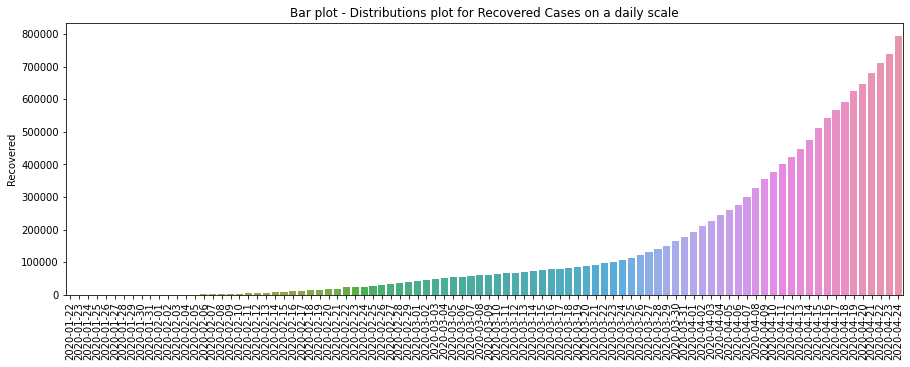

In [257]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"])
plt.title("Bar plot - Distributions plot for Recovered Cases on a daily scale")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

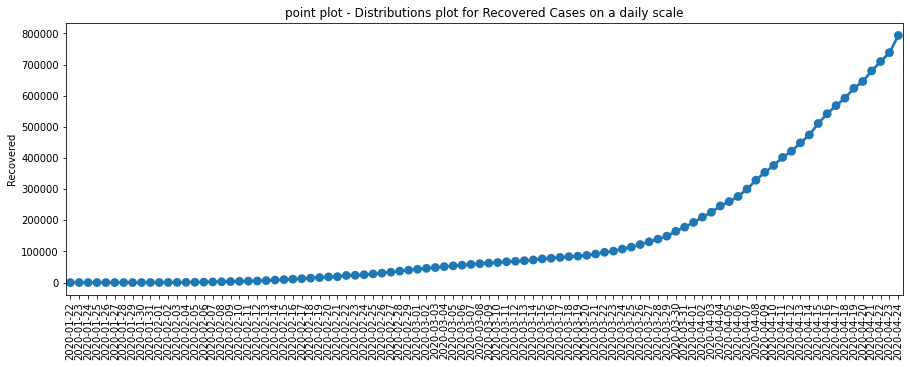

In [258]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.date,y=datewise["Recovered"])
plt.title("point plot - Distributions plot for Recovered Cases on a daily scale")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

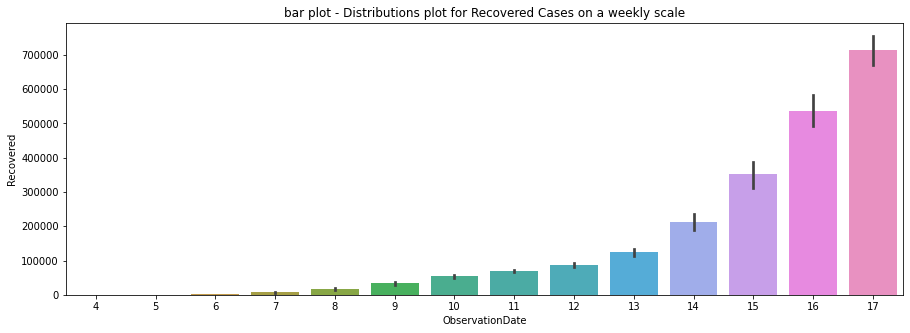

In [259]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.weekofyear,y=datewise["Recovered"])
plt.title("bar plot - Distributions plot for Recovered Cases on a weekly scale")
plt.xticks(rotation=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

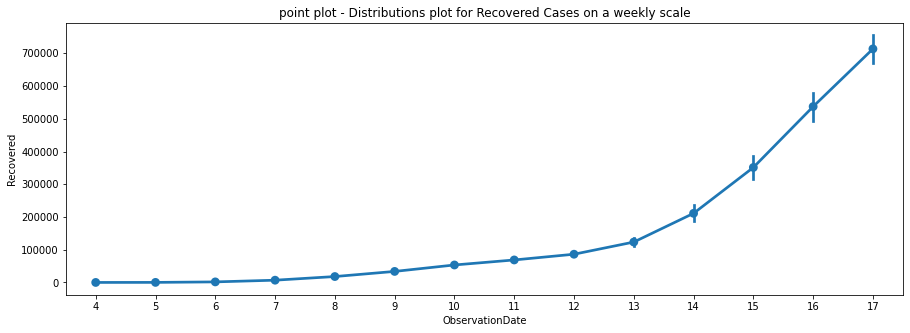

In [260]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.weekofyear,y=datewise["Recovered"])
plt.title("point plot - Distributions plot for Recovered Cases on a weekly scale")
plt.xticks(rotation=0)

# **Analyis of death case**

In [261]:
covid['Deaths'].describe

<bound method NDFrame.describe of 0        0
1        0
2        0
3        0
4        0
        ..
18322    7
18323    3
18324    0
18325    2
18326    1
Name: Deaths, Length: 18327, dtype: int64>

In [262]:
print("The number of people who died from Covid on the first day of analysis is :",
      datewise["Deaths"].iloc[1])

The number of people who died from Covid on the first day of analysis is : 18


In [263]:
print("The number of people who died from Covid on the last day of analysis is :",
      datewise["Deaths"].iloc[-1])

The number of people who died from Covid on the last day of analysis is : 197159


In [264]:
print("The average number of people who died from covid positive from the taken dates is  :",
   round(datewise["Deaths"].mean()))

The average number of people who died from covid positive from the taken dates is  : 35227


# **Analysis of death cases on daily and weekly basis**


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

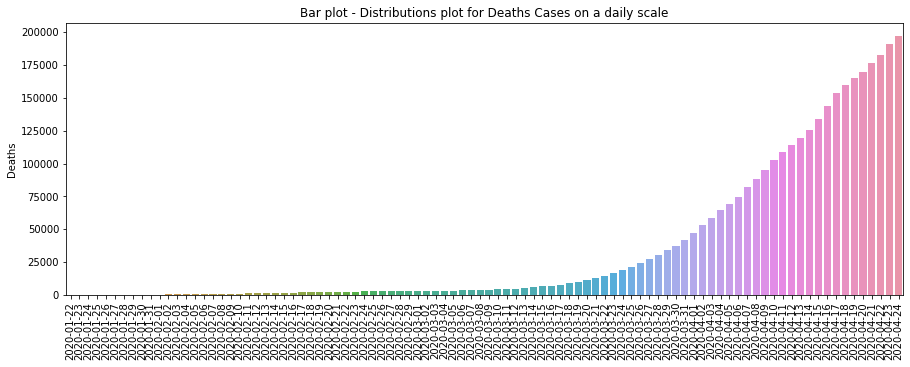

In [265]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Deaths"])
plt.title("Bar plot - Distributions plot for Deaths Cases on a daily scale")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

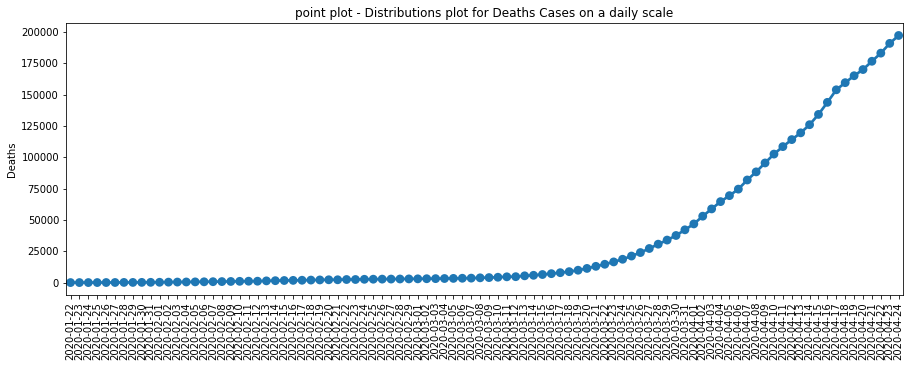

In [266]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.date,y=datewise["Deaths"])
plt.title("point plot - Distributions plot for Deaths Cases on a daily scale")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

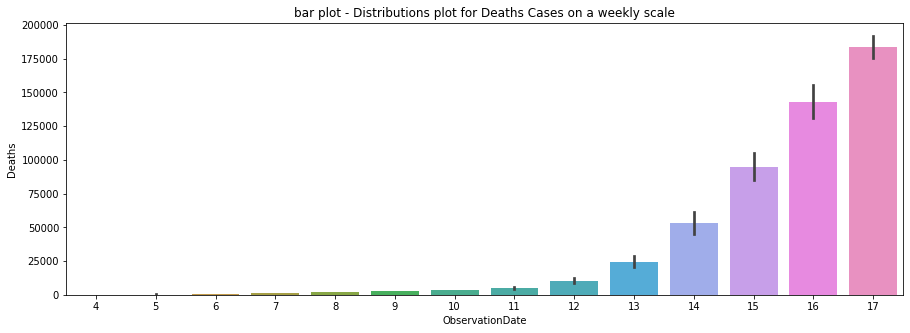

In [267]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.weekofyear,y=datewise["Deaths"])
plt.title("bar plot - Distributions plot for Deaths Cases on a weekly scale")
plt.xticks(rotation=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

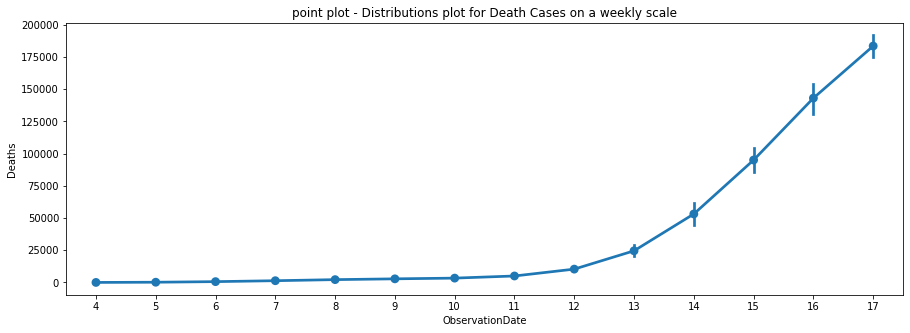

In [268]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.weekofyear,y=datewise["Deaths"])
plt.title("point plot - Distributions plot for Death Cases on a weekly scale")
plt.xticks(rotation=0)

# **Analysis of active cases**

In [269]:
datewise["ActiveCase"] = datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]

In [270]:
datewise['ActiveCase'].describe

<bound method NDFrame.describe of ObservationDate
2020-01-22        510
2020-01-23        605
2020-01-24        879
2020-01-25       1357
2020-01-26       2010
               ...   
2020-04-20    1656535
2020-04-21    1692721
2020-04-22    1731200
2020-04-23    1779541
2020-04-24    1820433
Name: ActiveCase, Length: 94, dtype: int64>

In [271]:
print("The number of people who are an active Covid case on the first day of analysis is :",
      datewise["ActiveCase"].iloc[1])

The number of people who are an active Covid case on the first day of analysis is : 605


In [272]:
print("The number of people who are an active Covid case on the last day of analysis is :",
      datewise["ActiveCase"].iloc[-1])

The number of people who are an active Covid case on the last day of analysis is : 1820433


In [273]:
print("The average number of people were active covid patients from the taken dates are  :",
   round(datewise["ActiveCase"].mean()))

The average number of people were active covid patients from the taken dates are  : 406468


# **Analysis of active cases on daily and weekly basis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

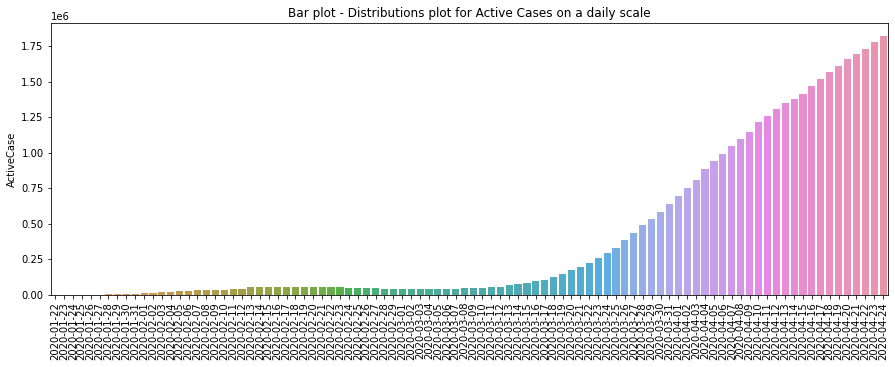

In [274]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["ActiveCase"])
plt.title("Bar plot - Distributions plot for Active Cases on a daily scale")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

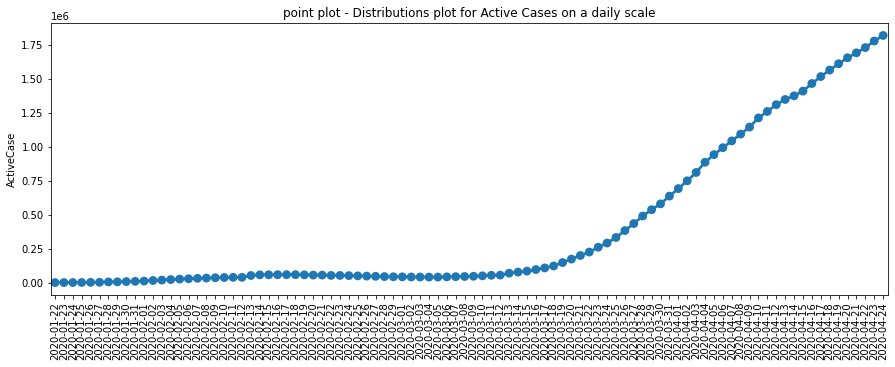

In [275]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.date,y=datewise["ActiveCase"])
plt.title("point plot - Distributions plot for Active Cases on a daily scale")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

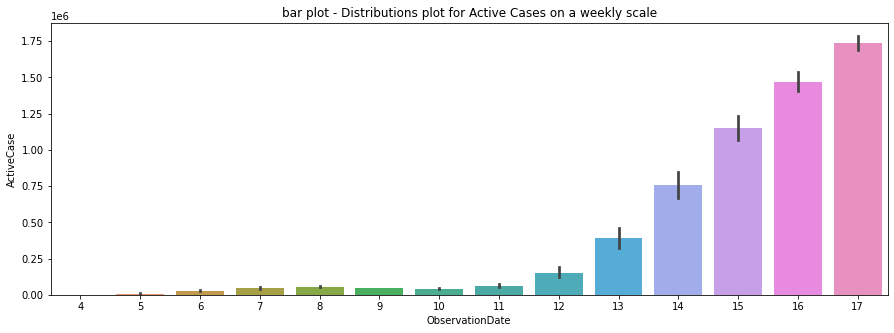

In [276]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.weekofyear,y=datewise["ActiveCase"])
plt.title("bar plot - Distributions plot for Active Cases on a weekly scale")
plt.xticks(rotation=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

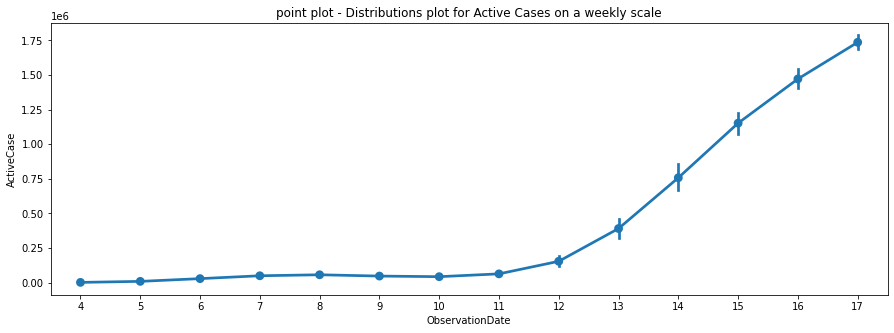

In [277]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.weekofyear,y=datewise["ActiveCase"])
plt.title("point plot - Distributions plot for Active Cases on a weekly scale")
plt.xticks(rotation=0)

# **Analysis of closed cases**

In [278]:
datewise["ClosedCase"] = datewise["Confirmed"] - datewise["Recovered"] + datewise["Deaths"]

In [279]:
datewise.describe

<bound method NDFrame.describe of                  Confirmed  Recovered  ...  ActiveCase  ClosedCase
ObservationDate                        ...                        
2020-01-22             555         28  ...         510         544
2020-01-23             653         30  ...         605         641
2020-01-24             941         36  ...         879         931
2020-01-25            1438         39  ...        1357        1441
2020-01-26            2118         52  ...        2010        2122
...                    ...        ...  ...         ...         ...
2020-04-20         2472259     645738  ...     1656535     1996507
2020-04-21         2549123     679819  ...     1692721     2045887
2020-04-22         2623960     709694  ...     1731200     2097332
2020-04-23         2708885     738486  ...     1779541     2161257
2020-04-24         2811193     793601  ...     1820433     2214751

[94 rows x 6 columns]>

In [280]:
print("The number of people who are a closed case on the first day of analysis is :",
      datewise["ClosedCase"].iloc[1])

The number of people who are a closed case on the first day of analysis is : 641


In [281]:
print("The number of people who are an closed Covid case on the last day of analysis is :",
      datewise["ClosedCase"].iloc[-1])

The number of people who are an closed Covid case on the last day of analysis is : 2214751


In [282]:
print("The average number of people were closed case covid patients from the taken dates are  :",
   round(datewise["ClosedCase"].mean()))

The average number of people were closed case covid patients from the taken dates are  : 476922


# **Analysis of closed cases based on daily and weekly basis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

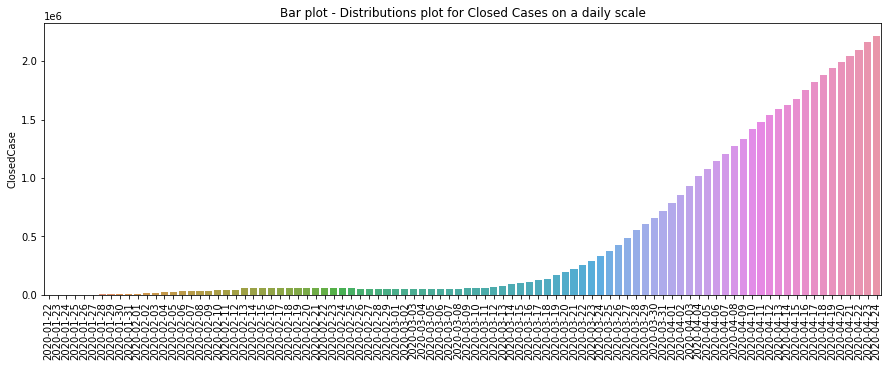

In [283]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["ClosedCase"])
plt.title("Bar plot - Distributions plot for Closed Cases on a daily scale")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

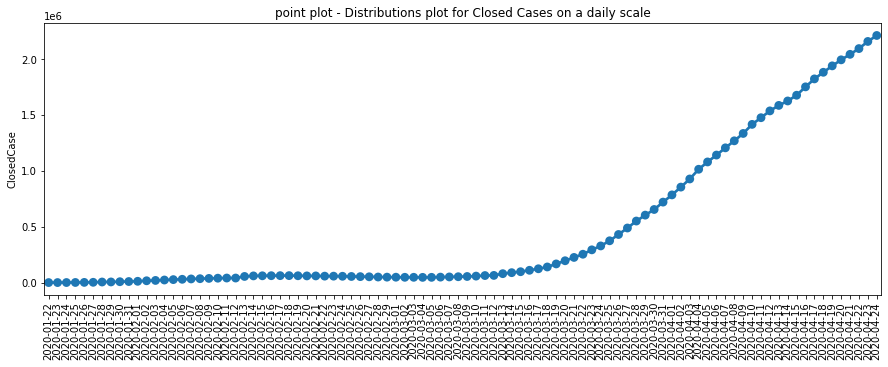

In [284]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.date,y=datewise["ClosedCase"])
plt.title("point plot - Distributions plot for Closed Cases on a daily scale")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

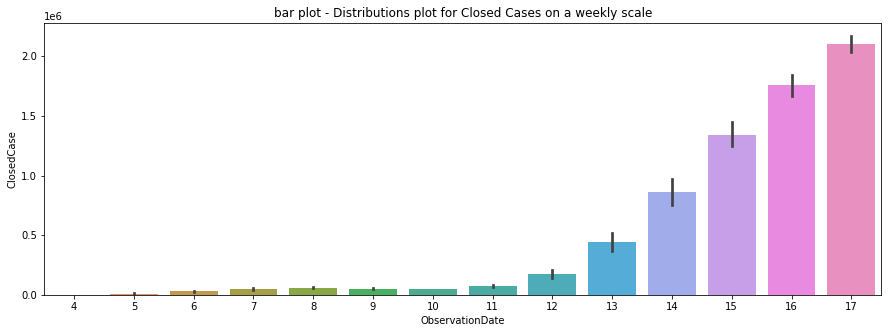

In [285]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.weekofyear,y=datewise["ClosedCase"])
plt.title("bar plot - Distributions plot for Closed Cases on a weekly scale")
plt.xticks(rotation=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

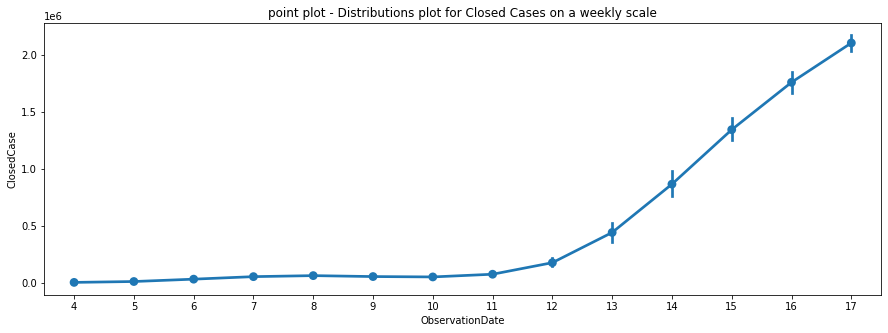

In [286]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.weekofyear,y=datewise["ClosedCase"])
plt.title("point plot - Distributions plot for Closed Cases on a weekly scale")
plt.xticks(rotation=0)

# **Mortality Rate Analysis**

In [287]:
datewise["Mortality"] = datewise["Deaths"] / datewise["Confirmed"] * 100

In [288]:
covid["Mortality"] = covid["Deaths"] / covid["Confirmed"] * 100

In [289]:
datewise['Mortality'].describe

<bound method NDFrame.describe of ObservationDate
2020-01-22   3 
2020-01-23   3 
2020-01-24   3 
2020-01-25   3 
2020-01-26   3 
             ..
2020-04-20   7 
2020-04-21   7 
2020-04-22   7 
2020-04-23   7 
2020-04-24   7 
Name: Mortality, Length: 94, dtype: float64>

In [290]:
print("The mortality rate  of people who are an active Covid case on the first day of analysis is :",
      datewise["Mortality"].iloc[1])

The mortality rate  of people who are an active Covid case on the first day of analysis is : 2.756508422664625


In [291]:
print("The mortality rate of people who are an active Covid case on the last day of analysis is :",
      datewise["Mortality"].iloc[-1])

The mortality rate of people who are an active Covid case on the last day of analysis is : 7.013356962684527


In [292]:
print("The average mortality rate of people were active covid patients from the taken dates are  :",
   round(datewise["Mortality"].mean()))

The average mortality rate of people were active covid patients from the taken dates are  : 4


# **Analysis of mortality rate on daily and weekly basis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

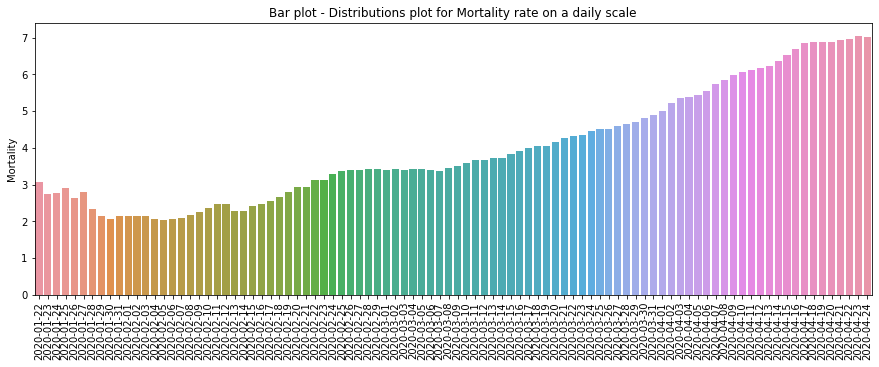

In [293]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Mortality"])
plt.title("Bar plot - Distributions plot for Mortality rate on a daily scale")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

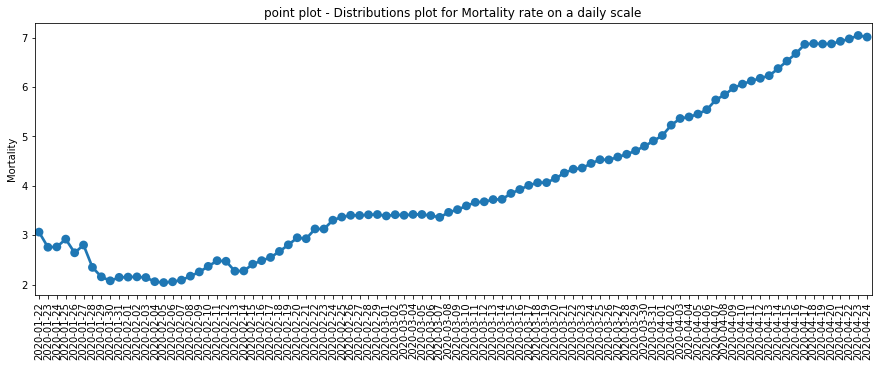

In [294]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.date,y=datewise["Mortality"])
plt.title("point plot - Distributions plot for Mortality rate on a daily scale")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

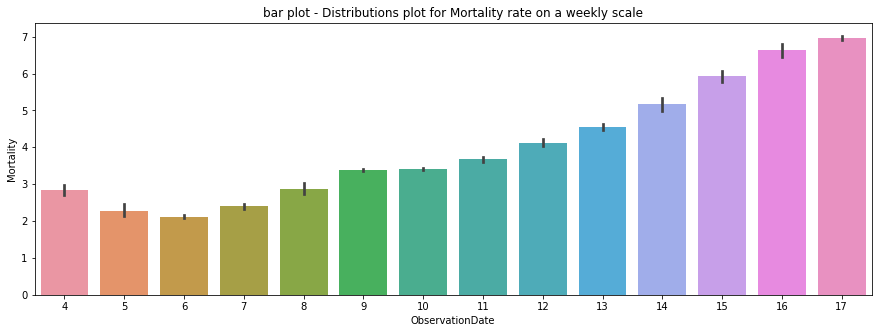

In [295]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.weekofyear,y=datewise["Mortality"])
plt.title("bar plot - Distributions plot for Mortality rate on a weekly scale")
plt.xticks(rotation=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

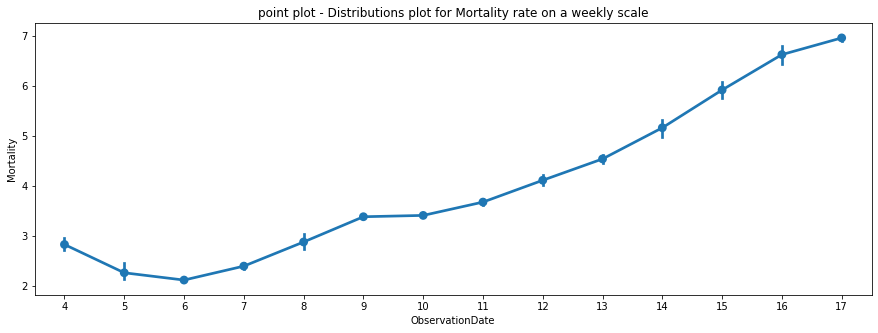

In [296]:
plt.figure(figsize=(15,5))
sns.pointplot(x=datewise.index.weekofyear,y=datewise["Mortality"])
plt.title("point plot - Distributions plot for Mortality rate on a weekly scale")
plt.xticks(rotation=0)

**There are many variables needed in order to find correct mortality rate which are evidently missing from the database hence resulting in termination of further processes in the current project**

# **Timely progression of different types of cases**

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

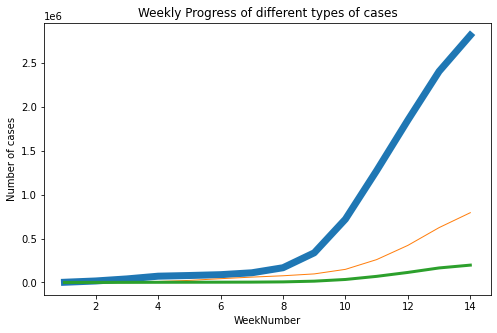

In [297]:

week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
weekwise_active = []
weekwise_closed = []
weekwise_mortality = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    weekwise_active.append(datewise[datewise["WeekofYear"]==i]["ActiveCase"].iloc[-1])
    weekwise_closed.append(datewise[datewise["WeekofYear"]==i]["ClosedCase"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=7)
plt.plot(week_num,weekwise_recovered,linewidth =1)
plt.plot(week_num,weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

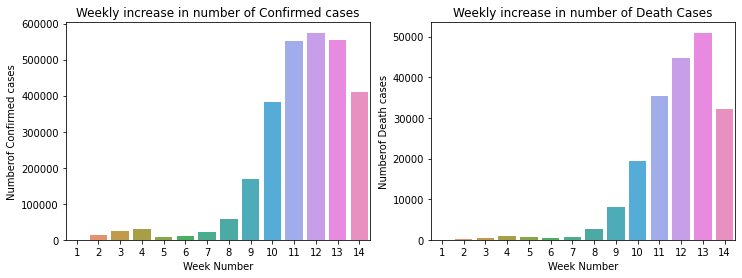

In [298]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

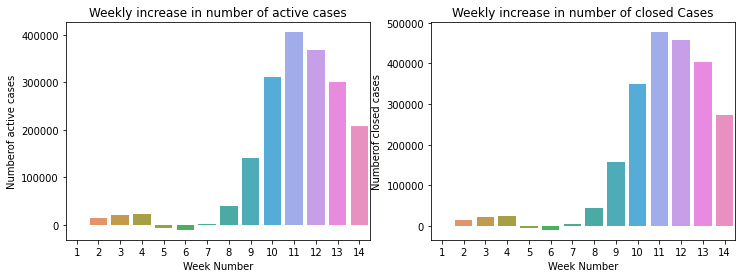

In [299]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_active).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_closed).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof active cases")
ax2.set_ylabel("Numberof closed cases")
ax1.set_title("Weekly increase in number of active cases")
ax2.set_title("Weekly increase in number of closed Cases")
plt.show()

In [300]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))
print("Average increase in number of active cases everyday:",np.round(datewise["ActiveCase"].diff().fillna(0).mean()))
print("Average increase in number of closed cases everyday:",np.round(datewise["ClosedCase"].diff().fillna(0).mean()))



Average increase in number of Confirmed cases everyday: 29900.0
Average increase in number of Recovered cases everyday: 8442.0
Average increase in number of Death cases everyday: 2097.0
Average increase in number of active cases everyday: 19361.0
Average increase in number of closed cases everyday: 23555.0


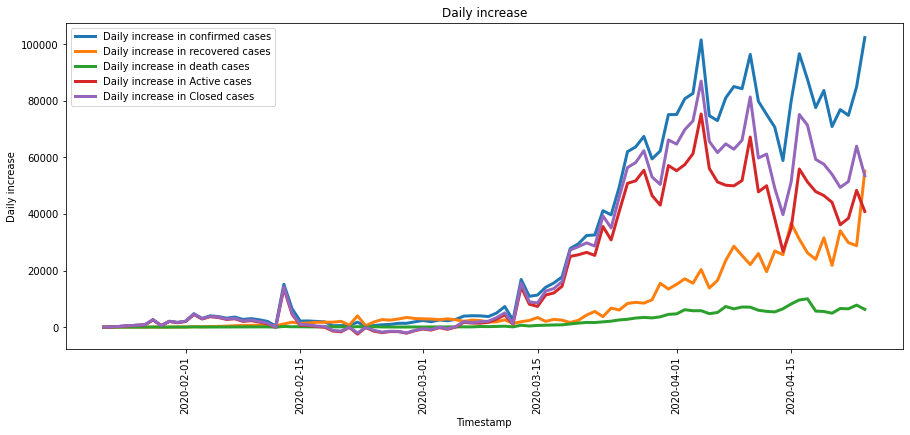

In [301]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.plot(datewise["ActiveCase"].diff().fillna(0),label="Daily increase in Active cases",linewidth=3)
plt.plot(datewise["ClosedCase"].diff().fillna(0),label="Daily increase in Closed cases",linewidth=3)

plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

# **Country wise analysis**

In [302]:
countrywise= covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)


In [303]:
countrywise

,Confirmed,Recovered,Deaths
Country/Region,,,
US,905333,99079,51949
Spain,219764,92355,22524
Italy,192994,60498,25969
France,159952,44271,22279
Germany,154999,109800,5760
...,...,...,...
Bhutan,7,3,0
Western Sahara,6,5,0
South Sudan,5,0,0


**India - Analysis**

In [341]:
ndia_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [342]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
datewise_india["date"] = datewise_india.index.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [343]:
datewise_india.index = np.arange(1, len(datewise_india) + 1)

In [344]:
datewise_india = datewise_india.reset_index().set_index('index')
datewise_india

,Confirmed,Recovered,Deaths,WeekofYear,date
index,,,,,
1,1,0,0,5,2020-01-30
2,1,0,0,5,2020-01-31
3,1,0,0,5,2020-02-01
4,2,0,0,5,2020-02-02
5,3,0,0,6,2020-02-03
...,...,...,...,...,...
82,18539,3273,592,17,2020-04-20
83,20080,3975,645,17,2020-04-21
84,21370,4370,681,17,2020-04-22


In [307]:
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("First day of dataset : ",datewise_india.iloc[1])
print("Last day of dataset : ",datewise_india.iloc[-1])
print("Total Active Cases on the first day of dataset in India are : ",datewise_india["Confirmed"].iloc[1]
-datewise_india["Recovered"].iloc[1]-datewise_india["Deaths"].iloc[1])
print("Total Active Cases on the last day of dataset in India are : ",datewise_india["Confirmed"].iloc[-1]
      -datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases on the first day of dataset in India are : ",datewise_india["Recovered"].iloc[1]
      +datewise_india["Deaths"].iloc[1])
print("Total Closed Cases on the final day of dataset in India are : ",datewise_india["Recovered"].iloc[-1]
      +datewise_india["Deaths"].iloc[-1])
print("Average increase in cases through out the dataset in India are :", round(datewise_india["Recovered"].mean()))


First day of dataset :  Confirmed    1
Recovered    0
Deaths       0
Name: 2020-01-31 00:00:00, dtype: int64
Last day of dataset :  Confirmed    24530
Recovered     5498
Deaths         780
Name: 2020-04-24 00:00:00, dtype: int64
Total Active Cases on the first day of dataset in India are :  1
Total Active Cases on the last day of dataset in India are :  18252
Total Closed Cases on the first day of dataset in India are :  0
Total Closed Cases on the final day of dataset in India are :  6278
Average increase in cases through out the dataset in India are : 486


In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [345]:
x = datewise_india["Confirmed"]
y = datewise_india["date"]

In [346]:
x

index
1         1
2         1
3         1
4         2
5         3
      ...  
82    18539
83    20080
84    21370
85    23077
86    24530
Name: Confirmed, Length: 86, dtype: int64

In [347]:
y

index
1     2020-01-30
2     2020-01-31
3     2020-02-01
4     2020-02-02
5     2020-02-03
         ...    
82    2020-04-20
83    2020-04-21
84    2020-04-22
85    2020-04-23
86    2020-04-24
Name: date, Length: 86, dtype: object

In [349]:
from sklearn.model_selection import train_test_split


In [350]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [351]:
from sklearn.linear_model import LinearRegression


In [352]:
model = LinearRegression()

In [362]:

x.reshape(-1,1)

AttributeError: ignored